## About Dataset
Extraction was done by Barry Becker from the 1994 Census database.
Prediction task is to determine whether a person makes over 50K a year.

## Columns are:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: <=50K or >50K

In [561]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [562]:
data = pd.read_csv("salary.csv")

In [437]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [569]:
data.duplicated().sum()

24

In [438]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [439]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [440]:
data.shape

(32561, 15)

In [441]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [442]:
data.dtypes == "object"

age               False
workclass          True
fnlwgt            False
education          True
education-num     False
marital-status     True
occupation         True
relationship       True
race               True
sex                True
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary             True
dtype: bool

In [443]:
data.corr() 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [444]:
data.corr() > 0.7

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,True,False,False,False,False,False
fnlwgt,False,True,False,False,False,False
education-num,False,False,True,False,False,False
capital-gain,False,False,False,True,False,False
capital-loss,False,False,False,False,True,False
hours-per-week,False,False,False,False,False,True


In [445]:
data['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [446]:
data['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

<AxesSubplot:>

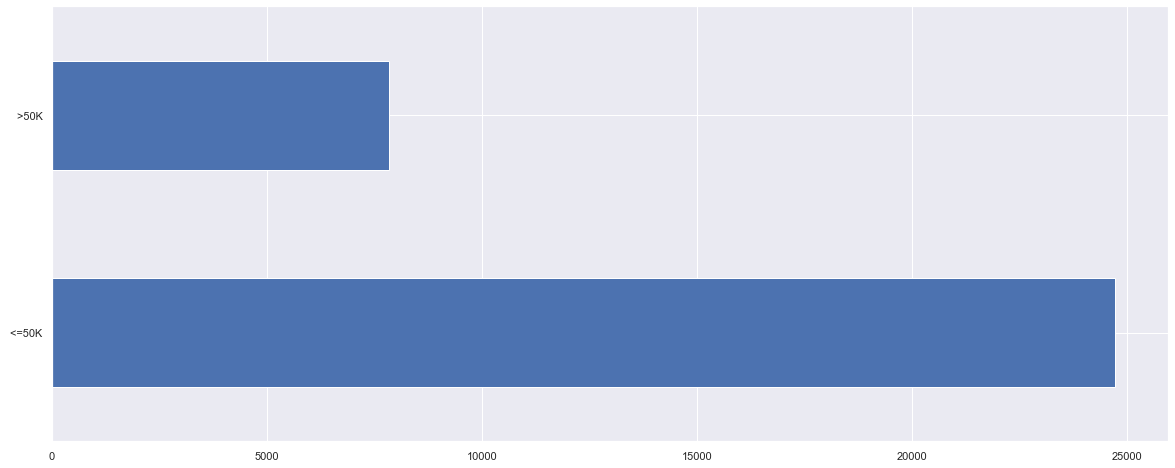

In [447]:
data['salary'].value_counts().plot(kind = 'barh')

In [448]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [449]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [450]:
data.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [451]:
data.age.unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

<AxesSubplot:xlabel='age', ylabel='Count'>

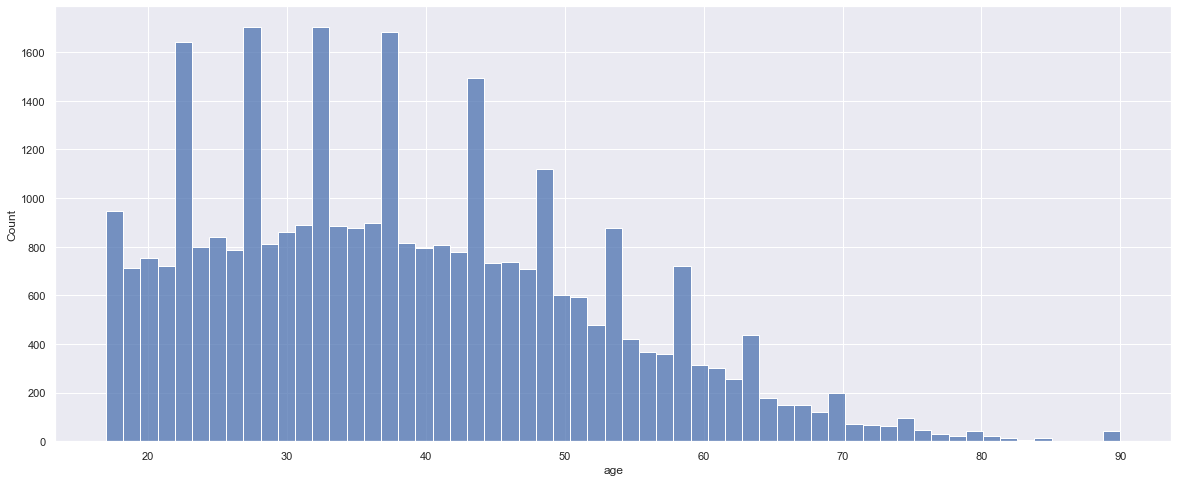

In [452]:
sns.histplot(data = data  , x = 'age')

<AxesSubplot:xlabel='age'>

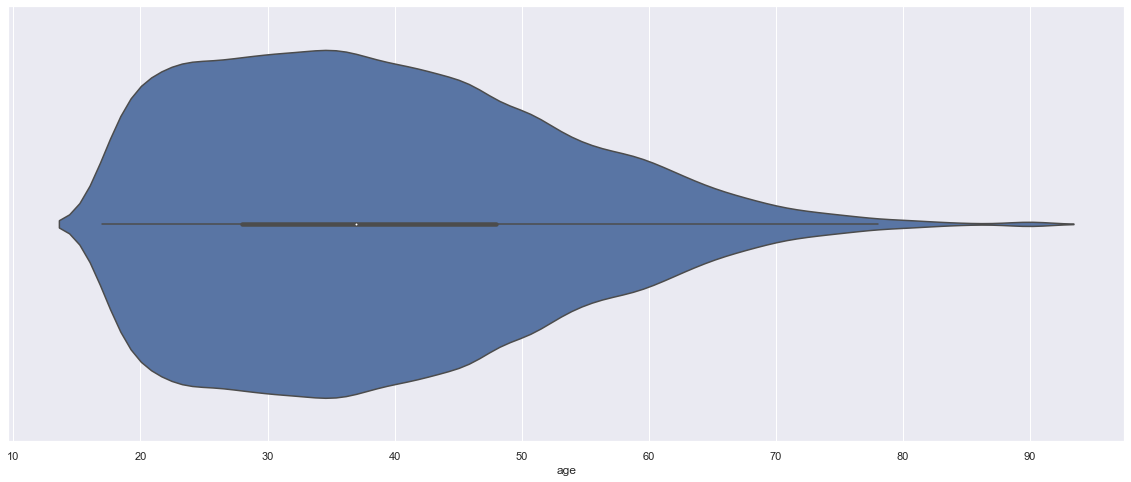

In [453]:
sns.violinplot(data = data  , x = 'age')

<AxesSubplot:xlabel='age', ylabel='salary'>

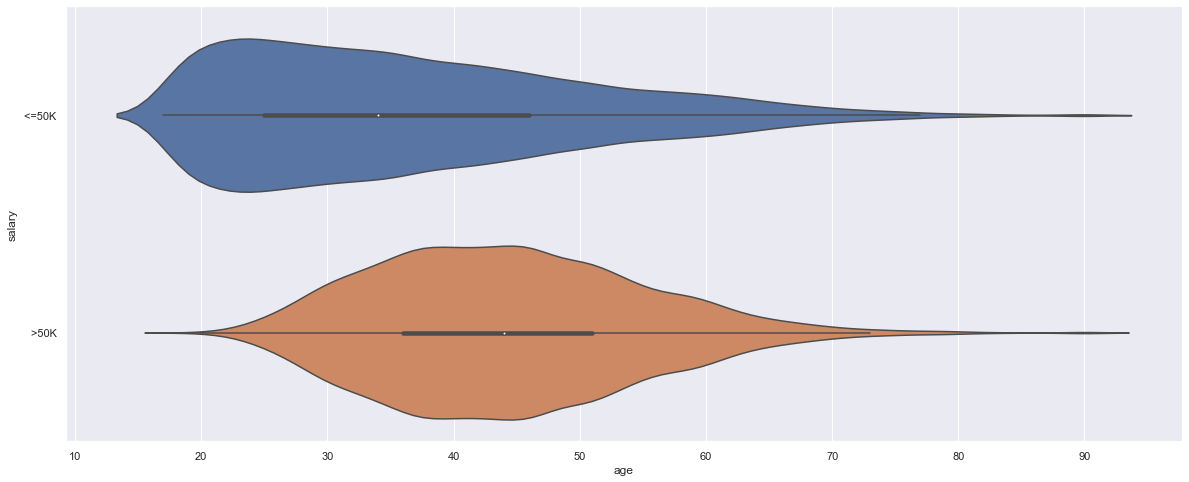

In [454]:
sns.violinplot(data = data  , x = 'age' , y  = 'salary')

<AxesSubplot:>

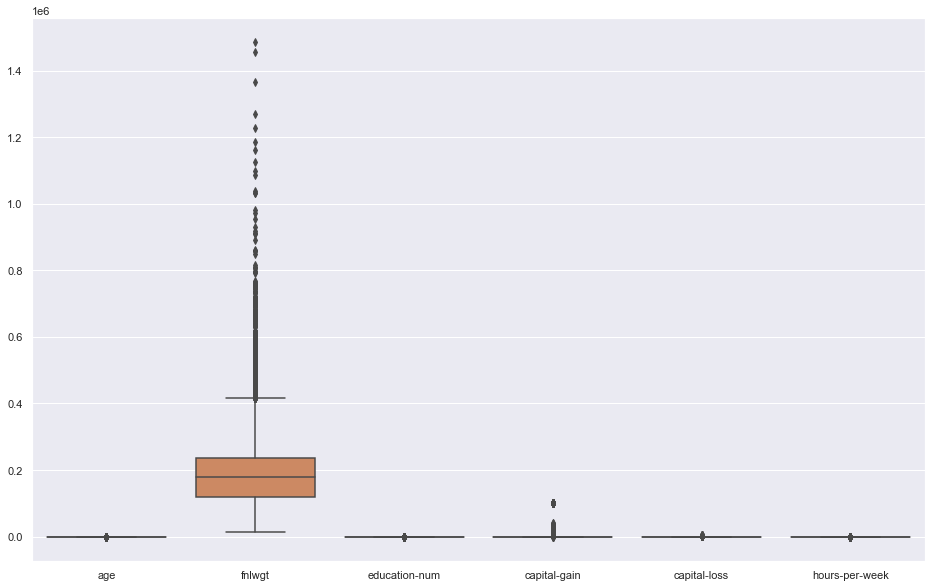

In [455]:
plt.figure(figsize=(16,10))
sns.boxplot(data = data )

In [456]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [457]:
data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [458]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

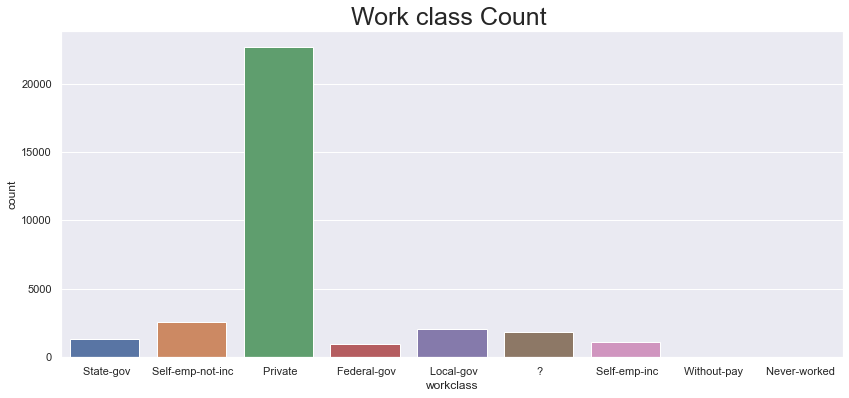

In [459]:
plt.figure(figsize=(14,6))
plt.title("Work class Count " , fontsize = 25)
sns.countplot(data = data , x = data.workclass ) 
plt.show()

In [460]:
data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
31754,26,State-gov,326033,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,80,United-States,<=50K


In [461]:
data.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

<AxesSubplot:title={'center':'Education Level '}>

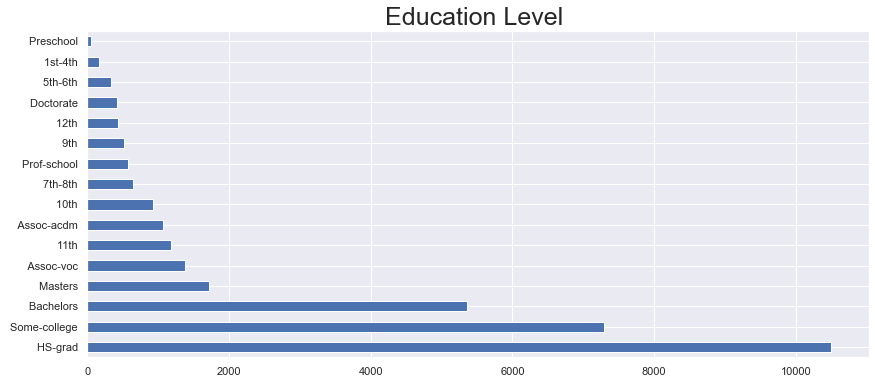

In [462]:
plt.figure(figsize=(14,6))
plt.title("Education Level " , fontsize = 25)
data.education.value_counts().plot(kind= "barh")

<AxesSubplot:title={'center':'Correlation Between Data '}>

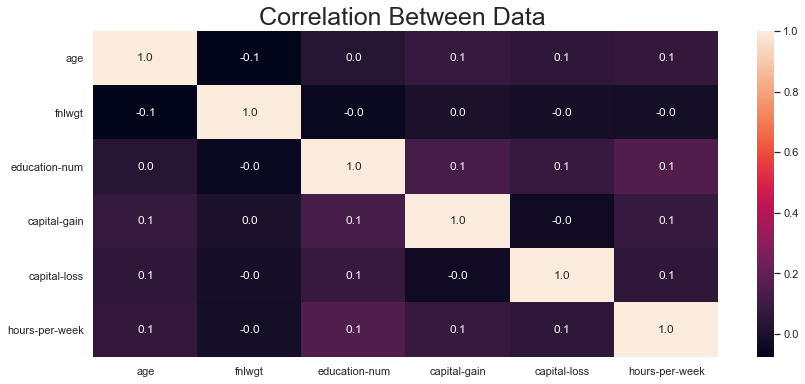

In [463]:
plt.figure(figsize=(14,6))
plt.title("Correlation Between Data " , fontsize = 25)
sns.heatmap(data.corr() , annot = True, fmt='.1f')

In [464]:
data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
23557,47,State-gov,149337,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Male,0,0,38,United-States,<=50K


In [465]:
data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

<AxesSubplot:title={'center':'Count of marital status '}, xlabel='marital-status', ylabel='count'>

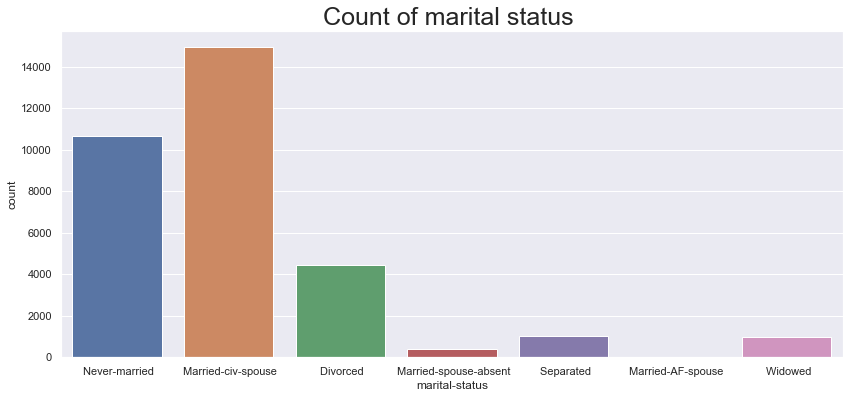

In [466]:
plt.figure(figsize=(14,6))
plt.title("Count of marital status " , fontsize = 25)
sns.countplot(data = data , x = 'marital-status')

In [467]:
data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
12775,28,Private,48894,HS-grad,9,Married-civ-spouse,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:title={'center':'Count Gender values '}>

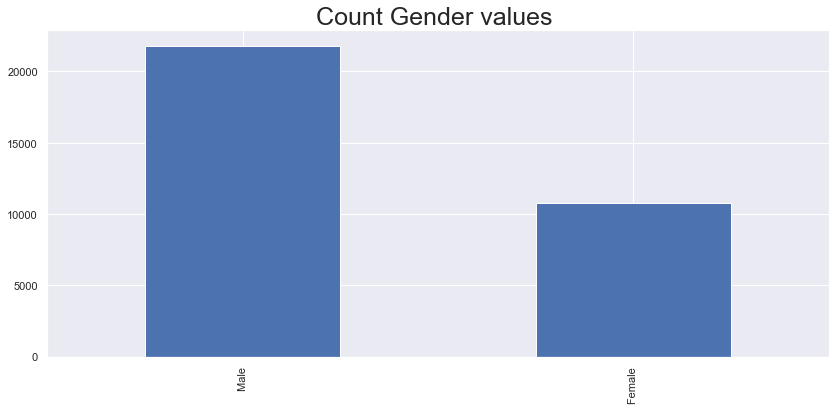

In [468]:
plt.figure(figsize=(14,6))
plt.title("Count Gender values " , fontsize = 25)
data.sex.value_counts().plot(kind = "bar")

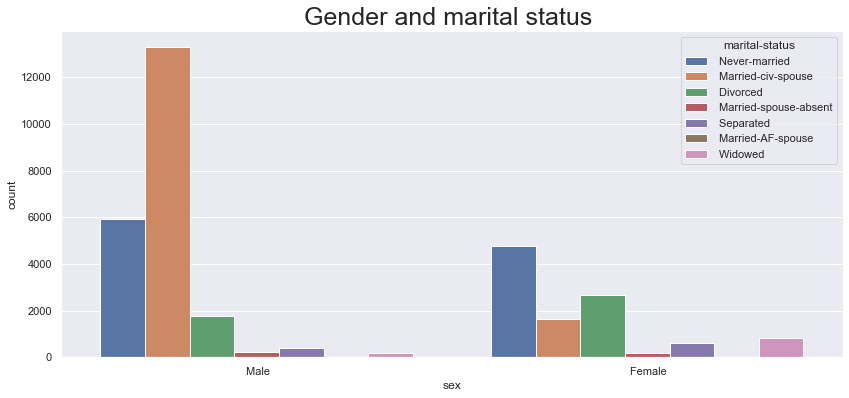

In [469]:
plt.figure(figsize=(14,6))
plt.title("Gender and marital status " , fontsize = 25)
sns.countplot(data = data , x = "sex" , hue = 'marital-status')
plt.show()

In [470]:
data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
30886,37,Private,170020,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


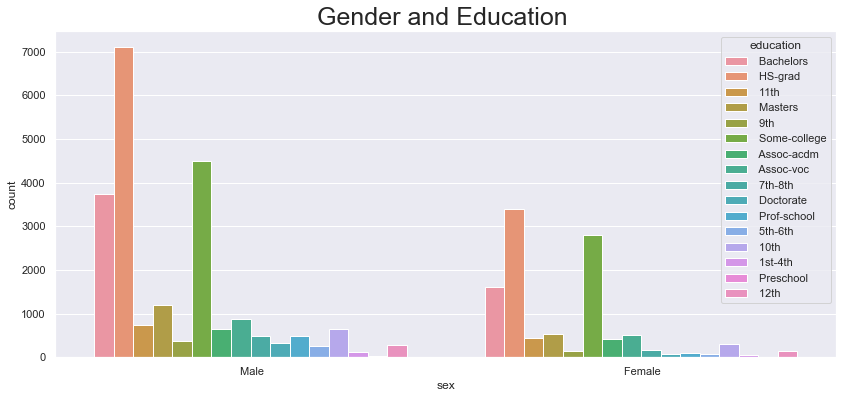

In [471]:
plt.figure(figsize=(14,6))
plt.title("Gender and Education " , fontsize = 25)
sns.countplot(data = data , x = "sex" , hue = 'education')
plt.show()

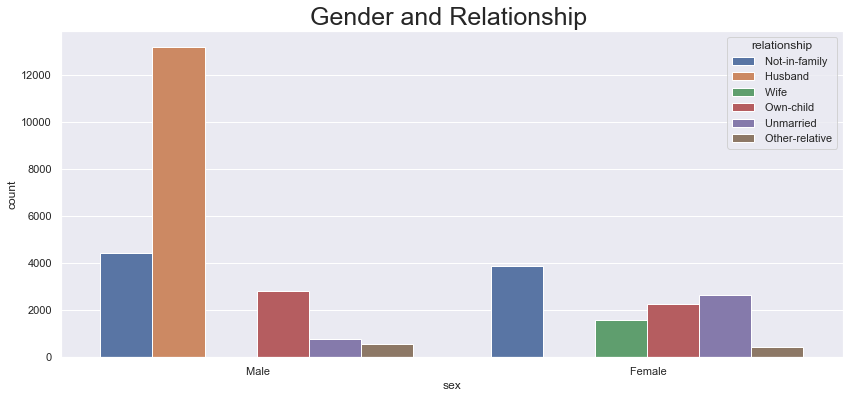

In [472]:
plt.figure(figsize=(14,6))
plt.title("Gender and Relationship " , fontsize = 25)
sns.countplot(data = data , x = "sex" , hue = 'relationship')
plt.show()

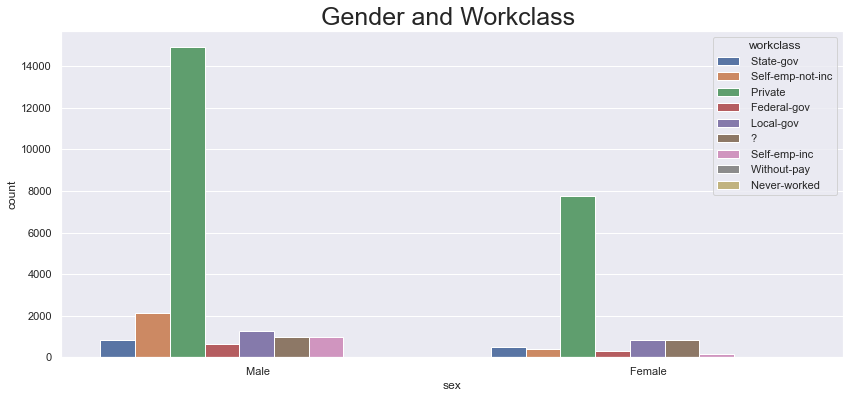

In [473]:
plt.figure(figsize=(14,6))
plt.title("Gender and Workclass " , fontsize = 25)
sns.countplot(data = data , x = "sex" , hue = 'workclass')
plt.show()

In [474]:
data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
19474,56,Private,247337,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K


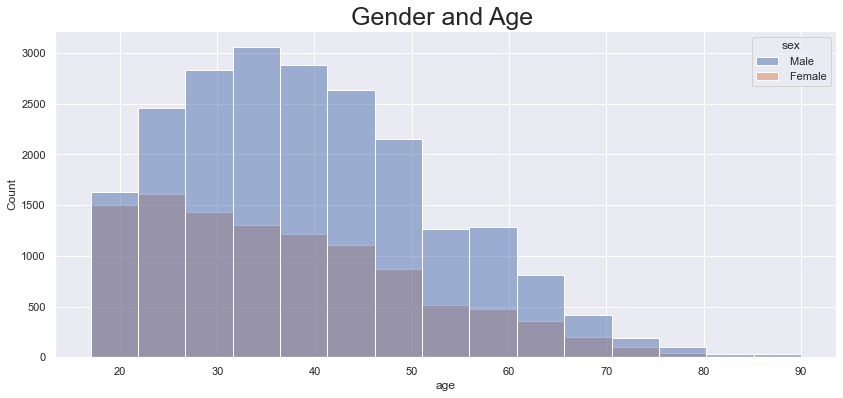

In [475]:
plt.figure(figsize=(14,6))
plt.title("Gender and Age " , fontsize = 25)
sns.histplot(data = data , x = "age" , hue = "sex" , bins = 15)
plt.show()

In [476]:
data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
6831,45,Private,125489,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,0,0,50,United-States,<=50K


In [477]:
data['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

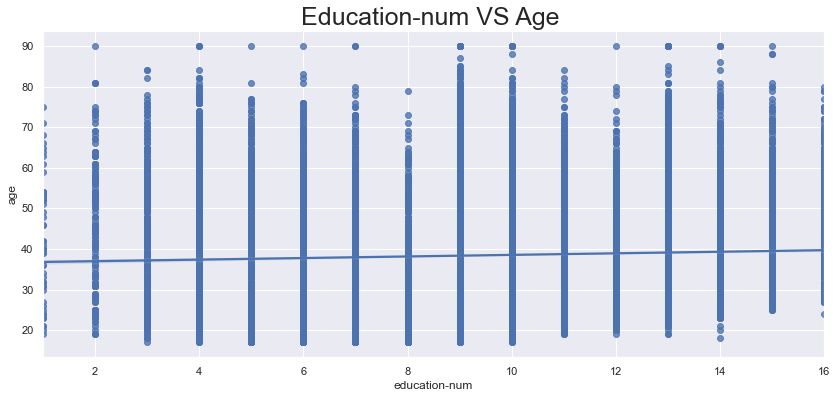

In [478]:
plt.figure(figsize=(14,6))
plt.title("Education-num VS Age " , fontsize = 25)
sns.regplot(data = data , x = data['education-num'] , y ="age" )
plt.show()

In [479]:
## no relationship between increasing age and Education Number for smoeone

In [480]:
data.salary.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [481]:
# replace salary values with 0 and 1 
data.salary = data.salary.replace(" <=50K" , 0).replace(" >50K" , 1)

In [482]:
data.salary.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

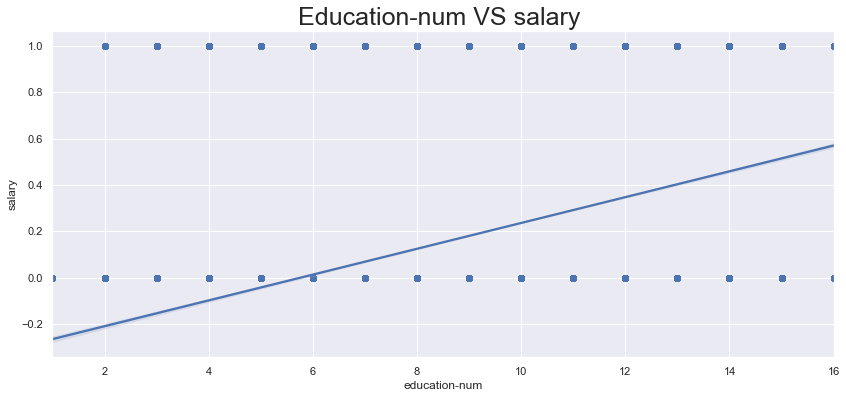

In [483]:
plt.figure(figsize=(14,6))
plt.title("Education-num VS salary " , fontsize = 25)
sns.regplot(data = data , x = data['education-num'] , y ="salary" )
plt.show()

It seems like there is a relationship between increasing education-num it affected salary increasing

In [484]:
data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
18482,29,Local-gov,376302,Assoc-voc,11,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,35,Nicaragua,1


In [485]:
data.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

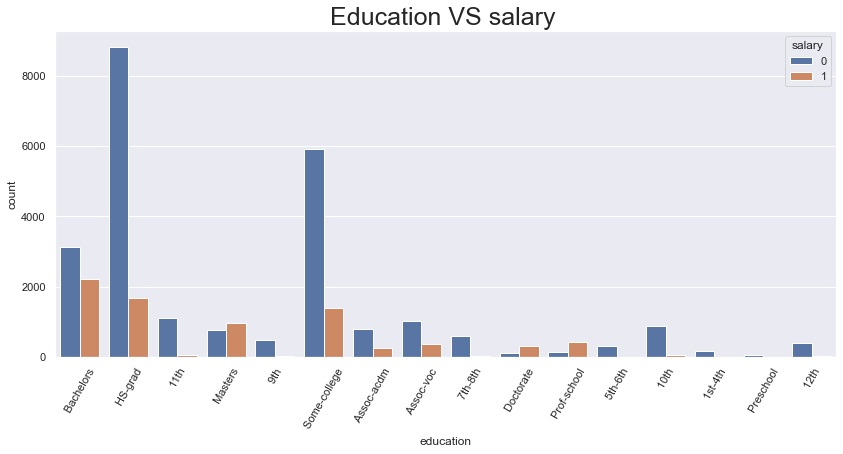

In [486]:
plt.figure(figsize=(14,6))
plt.title("Education VS salary " , fontsize = 25)
sns.countplot(data = data , x = "education" ,hue = "salary" )
plt.xticks(rotation= 60)
plt.show()

In [487]:
data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8575,64,Self-emp-inc,181408,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


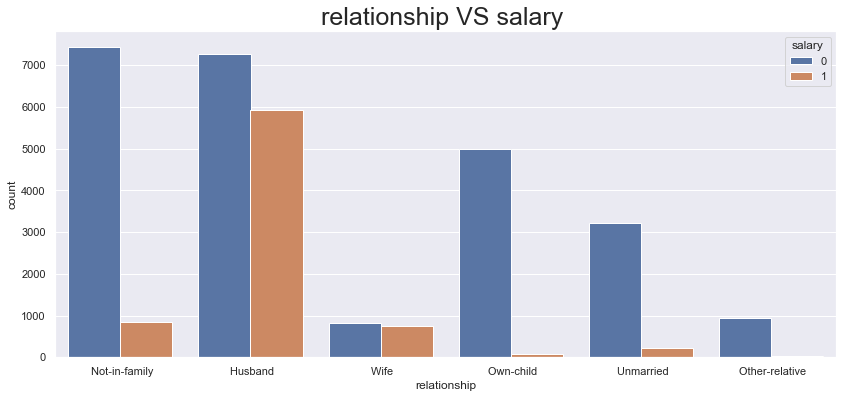

In [488]:
plt.figure(figsize=(14,6))
plt.title("relationship VS salary " , fontsize = 25)
sns.countplot(data = data , x = data.relationship , hue = data.salary  )
plt.show()

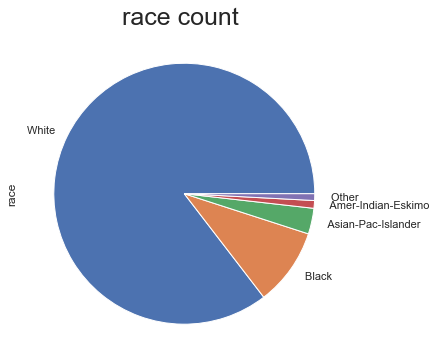

In [489]:
plt.figure(figsize=(14,6))
plt.title("race count " , fontsize = 25)
data.race.value_counts().plot(kind = "pie" )
plt.show()

In [490]:
data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
26117,46,Private,63299,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,United-States,0


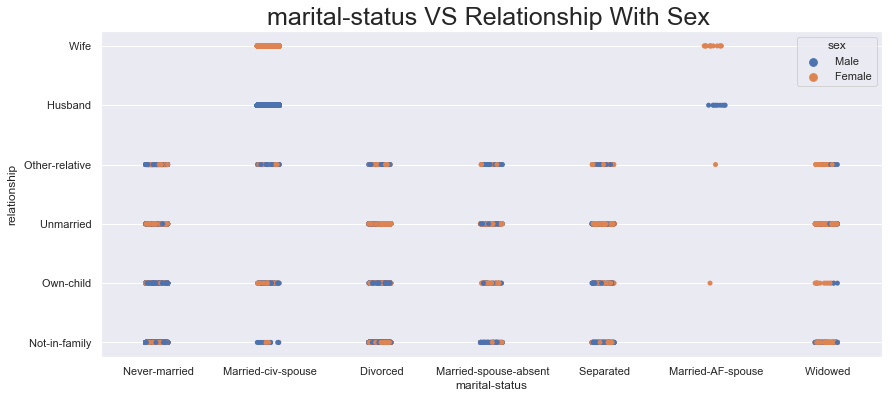

In [491]:
plt.figure(figsize=(14,6))
plt.title("marital-status VS Relationship With Sex " , fontsize = 25)
sns.stripplot(data= data ,x = "marital-status" , y = "relationship" , hue = "sex" )
plt.show()

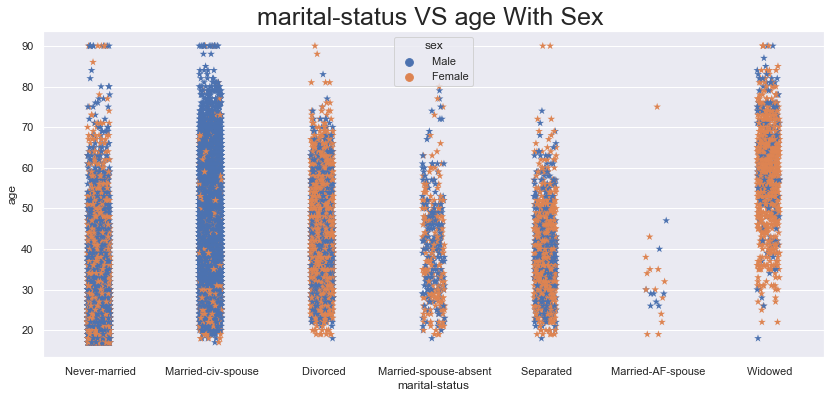

In [492]:
plt.figure(figsize=(14,6))
plt.title("marital-status VS age With Sex " , fontsize = 25)
sns.stripplot(data= data ,x = "marital-status" , y = "age" , hue = "sex",marker='*', size =8 )
plt.show()

In [493]:
data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8679,28,Private,274679,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,0


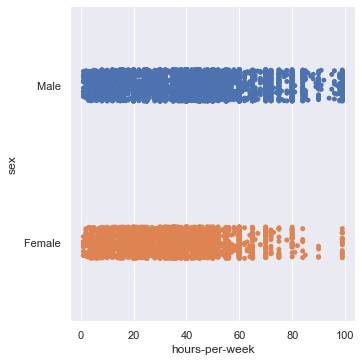

In [494]:
sns.catplot(data = data , x ="hours-per-week" , y = "sex" )

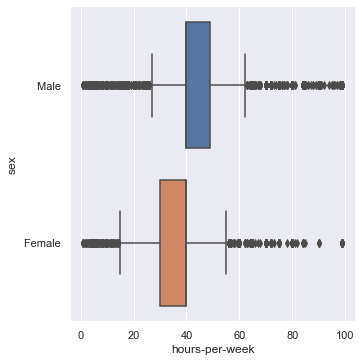

In [495]:
sns.catplot(data = data , x ="hours-per-week" , kind = "box" , y = "sex")

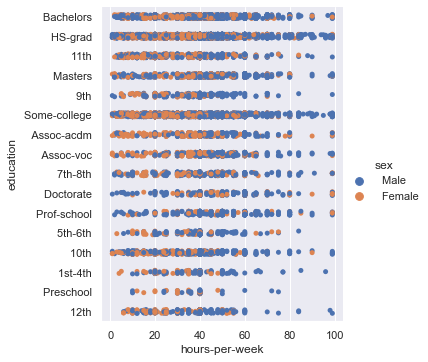

In [496]:
sns.catplot(data = data , x ="hours-per-week" ,  y = "education" , hue = "sex")

In [497]:
data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
16020,69,Private,159522,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,Black,Female,2964,0,40,United-States,0


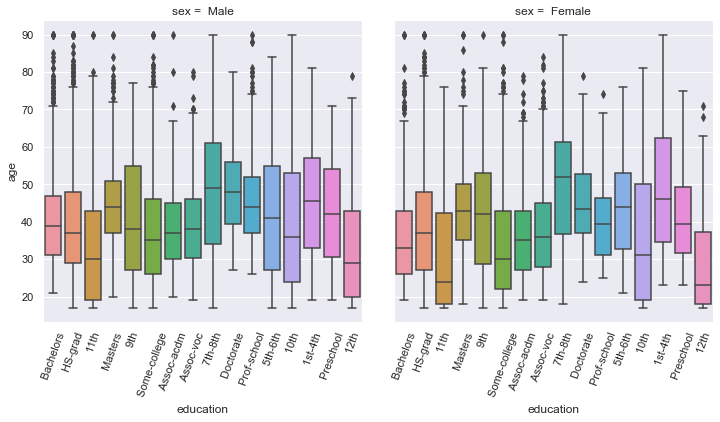

In [498]:
ax = sns.catplot(x='education', y='age', 
            data=data, 
            kind='box',
            col='sex' , 
            row_order=['Male', 'Female']
           )
ax.set_xticklabels(rotation = 70)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

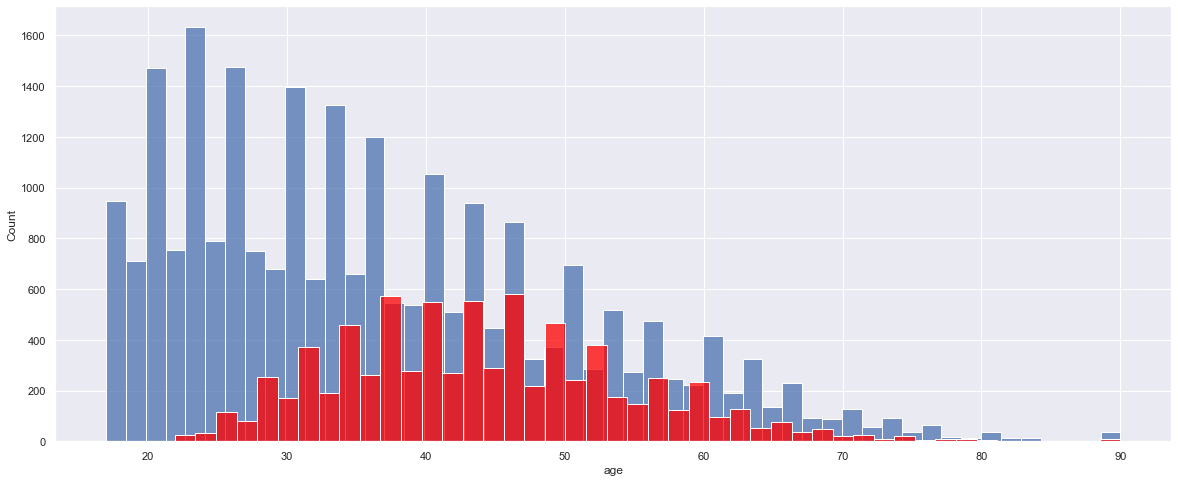

In [499]:
sns.histplot(data[data['salary'] ==0]['age'])
sns.histplot(data[data['salary'] ==1]['age'] , color='red')

### There are more number of peoples having salary higher than 50k in age range of 38 - 48


<AxesSubplot:xlabel='marital-status', ylabel='Count'>

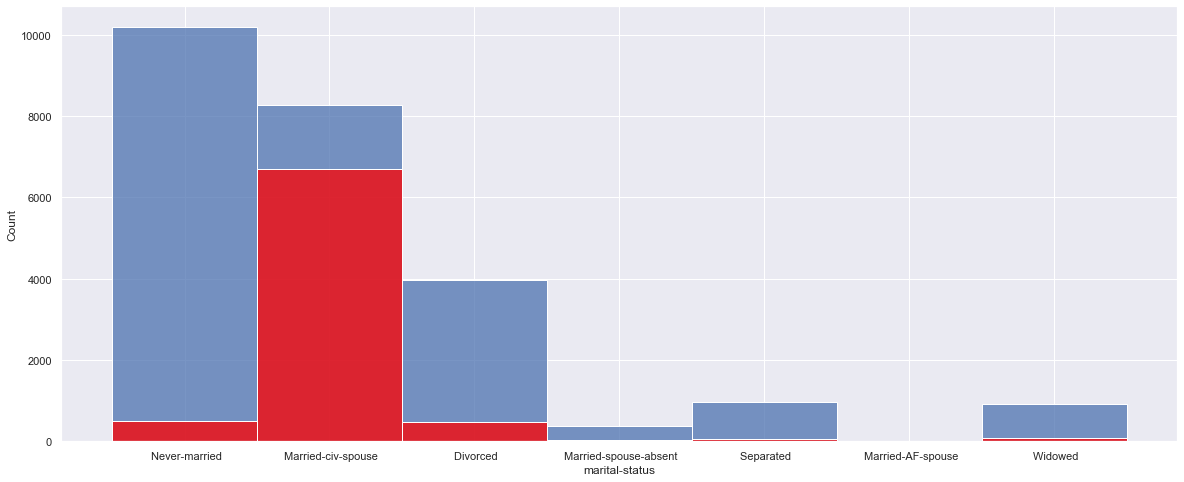

In [500]:
sns.histplot(data[data['salary'] ==0]['marital-status'])
sns.histplot(data[data['salary'] ==1]['marital-status'] , color='red')

### It can be seen that large number of married peoples have salary higher than 50k

<AxesSubplot:xlabel='education', ylabel='Count'>

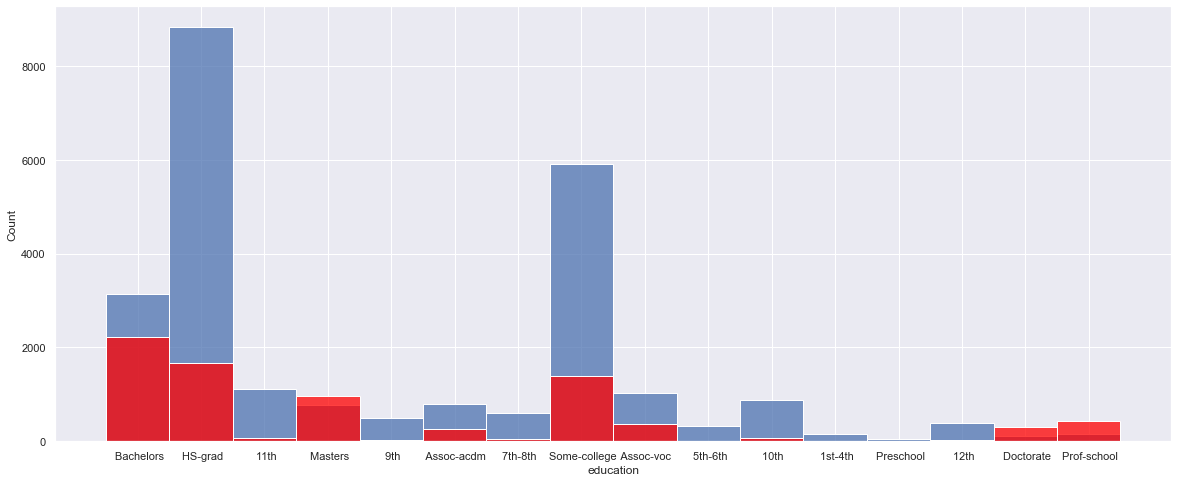

In [501]:
sns.histplot(data[data['salary'] ==0]['education'])
sns.histplot(data[data['salary'] ==1]['education'] , color='red')

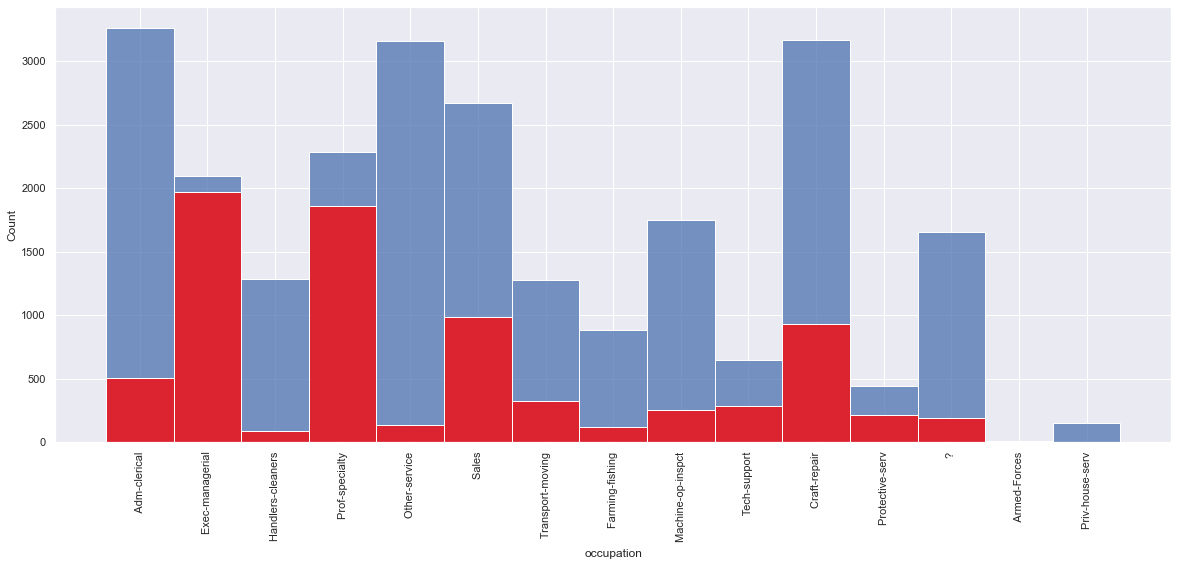

In [502]:
sns.histplot(data[data['salary'] ==0]['occupation'])
sns.histplot(data[data['salary'] ==1]['occupation'] , color='red')
plt.xticks(rotation='vertical')
plt.show()

### Almost all executive managers and armed force person has salary above 50k obviously


## Cleaning Data 
- Merge variables 1st-4th , 5th-6th , 7th-8th , 10th , 11th , 12th , 'Pre-school' as Primary School of workclass columns
- Also merge variables 'Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college' as High School
- Merge martial-status 'Married-civ-spouse', 'Married-AF-spouse' a married and remaining as others
- Change '?' in workclass , native-country , occupation with most repeating value
- In country column most values are US so consider others as one
- Covert salary and sex column to 1 and 0

In [503]:
data.education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [504]:
data['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,inplace = True , regex = True)

In [505]:
data['education'].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

In [506]:
data.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
23389,39,Private,177277,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,1


In [507]:
data.education.value_counts()

 HS-grad      10501
 higher       10316
 Bachelors     5355
 school        4253
 Masters       1723
 Doctorate      413
Name: education, dtype: int64

In [508]:
data['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace=True , regex = True)

In [509]:
data['marital-status'].replace(['Divorced', 'Separated','Widowed', 'Married-spouse-absent' , 'Never-married'] , 'other' , inplace=True , regex = True)

In [510]:
data['marital-status'].value_counts()

 other      17562
 married    14999
Name: marital-status, dtype: int64

In [511]:
data['workclass'] = data['workclass'].str.replace('?', 'Private' )

<ipython-input-511-36f8c8b80c06>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['workclass'] = data['workclass'].str.replace('?', 'Private' )


In [512]:
data['occupation'] = data['occupation'].str.replace('?', 'Prof-specialty' )
data['native-country'] = data['native-country'].str.replace('?', 'United-States' )

<ipython-input-512-e4587f3bdcd0>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['occupation'] = data['occupation'].str.replace('?', 'Prof-specialty' )
<ipython-input-512-e4587f3bdcd0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['native-country'] = data['native-country'].str.replace('?', 'United-States' )


In [513]:
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
21322,42,Self-emp-not-inc,320744,HS-grad,9,married,Sales,Husband,White,Male,3908,0,45,United-States,0
1174,47,Private,183013,HS-grad,9,married,Other-service,Husband,White,Male,0,0,40,United-States,0
24822,34,Private,100950,higher,11,other,Prof-specialty,Unmarried,White,Female,0,0,40,Germany,0
22318,32,Private,157289,HS-grad,9,other,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States,0
895,40,Private,170108,Masters,14,married,Prof-specialty,Husband,White,Male,0,0,40,United-States,0
3725,18,Private,298133,higher,10,other,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
22521,50,Private,145409,HS-grad,9,married,Transport-moving,Husband,White,Male,0,0,50,United-States,1
11352,53,Self-emp-inc,251675,higher,10,other,Sales,Not-in-family,White,Male,8614,0,50,Cuba,1
8955,30,Self-emp-not-inc,250499,higher,10,married,Adm-clerical,Wife,White,Female,0,0,55,United-States,1
23871,20,Private,147344,higher,10,other,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,0


In [514]:
data.shape

(32561, 15)

In [515]:
data['native-country'].value_counts()

 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [516]:
for i in data['native-country']:
    if i !=  ' United-States':
        data['native-country'].replace([i] , "Others" , inplace = True)

In [517]:
data['native-country'].value_counts()

 United-States    29753
Others             2808
Name: native-country, dtype: int64

In [518]:
data['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [519]:
data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

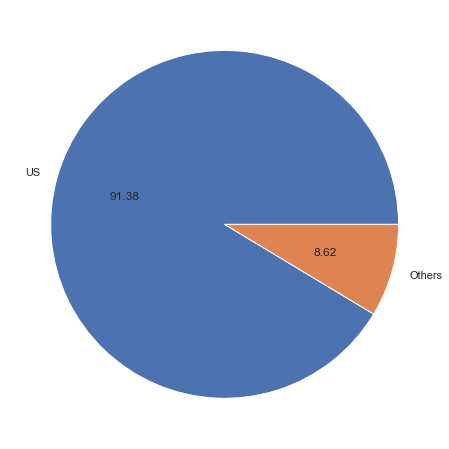

In [520]:
plt.pie(data['native-country'].value_counts() , labels = ['US' ,'Others'] , autopct = '%0.2f')
plt.show()

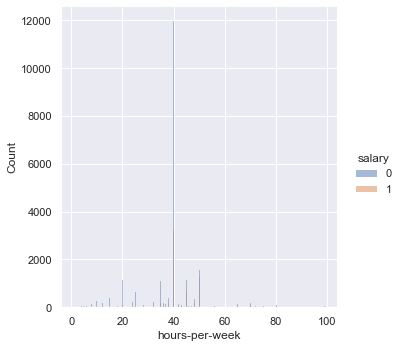

In [521]:
sns.displot(data = data , x ="hours-per-week" , hue = "salary")

## Feature Engineering and Model Training

In [522]:
from sklearn.preprocessing import LabelEncoder

In [523]:
lb = LabelEncoder()

In [524]:
data = data.apply(lb.fit_transform)

In [525]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,22,6,2671,0,12,1,0,1,4,1,25,0,39,0,0
1,33,5,2926,0,12,0,3,0,4,1,0,0,12,0,0
2,21,3,14086,2,8,1,5,1,4,1,0,0,39,0,0
3,36,3,15336,5,6,0,5,0,2,1,0,0,39,0,0
4,11,3,19355,0,12,0,9,5,2,0,0,0,39,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,16528,4,11,0,12,5,4,0,0,0,37,0,0
32557,23,3,8080,2,8,0,6,0,4,1,0,0,39,0,1
32558,41,3,7883,2,8,1,0,4,4,0,0,0,39,0,0
32559,5,3,12881,2,8,1,0,3,4,1,0,0,19,0,0


In [526]:
data.shape

(32561, 15)

In [527]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int32
 14  salary          32561 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 2.7 MB


In [528]:
## all columns are int ! 

In [529]:
X=data.drop(columns='salary')
y=data['salary']

In [530]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,6,2671,0,12,1,0,1,4,1,25,0,39,0
1,33,5,2926,0,12,0,3,0,4,1,0,0,12,0
2,21,3,14086,2,8,1,5,1,4,1,0,0,39,0
3,36,3,15336,5,6,0,5,0,2,1,0,0,39,0
4,11,3,19355,0,12,0,9,5,2,0,0,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,16528,4,11,0,12,5,4,0,0,0,37,0
32557,23,3,8080,2,8,0,6,0,4,1,0,0,39,0
32558,41,3,7883,2,8,1,0,4,4,0,0,0,39,0
32559,5,3,12881,2,8,1,0,3,4,1,0,0,19,0


In [531]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [532]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [533]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [534]:
X_train

array([[-0.92093407,  1.72174628, -1.16783171, ..., -0.20557834,
         1.20635045, -0.30964688],
       [-1.21509091, -0.08646044,  0.18747308, ..., -0.20557834,
         0.79399872, -0.30964688],
       [ 0.844007  , -0.08646044,  1.33651065, ..., -0.20557834,
        -0.44305649, -0.30964688],
       ...,
       [ 0.1821541 , -0.08646044, -1.08141799, ..., -0.20557834,
        -0.03070475, -0.30964688],
       [-1.28863013, -0.08646044, -0.04014925, ..., -0.20557834,
        -0.03070475, -0.30964688],
       [-1.1415517 , -0.08646044, -1.29513468, ..., -0.20557834,
        -0.03070475, -0.30964688]])

In [535]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [536]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [537]:
prediction_1 = lr.predict(X_test)
accuracy_score(y_test, prediction_1)

0.8420082911100876

In [538]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [539]:
prediction_2= rf_classifier.predict(X_test)
accuracy_score(y_test, prediction_2)

0.8561338860740059

In [540]:
print(classification_report(y_test, prediction_2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4939
           1       0.74      0.62      0.67      1574

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [541]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [542]:
prediction_3= ada.predict(X_test)
accuracy_score(y_test, prediction_3)

0.8638108398587441

In [543]:
from sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier()
etc.fit(X_train,y_train)

ExtraTreesClassifier()

In [544]:
prediction_4= etc.predict(X_test)
accuracy_score(y_test, prediction_4)

0.8496852448948258

In [545]:
print(classification_report(y_test, prediction_4))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4939
           1       0.72      0.61      0.66      1574

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.85      6513



In [546]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC()

In [547]:
prediction_5= svc.predict(X_test)
accuracy_score(y_test, prediction_5)

0.8524489482573315

In [548]:
from sklearn.ensemble import BaggingClassifier , GradientBoostingClassifier

In [549]:
bg = BaggingClassifier()
bg.fit(X_train,y_train)

BaggingClassifier()

In [550]:
prediction_6= bg.predict(X_test)
accuracy_score(y_test, prediction_6)

0.8441578381698143

In [551]:
gbc = GradientBoostingClassifier()

In [552]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [553]:
prediction_7= gbc.predict(X_test)
accuracy_score(y_test, prediction_7)

0.8694917856594503

In [554]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [555]:
model = keras.Sequential()

In [556]:
model

In [557]:
model.add(Dense(50 ,input_shape=(14,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [558]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [560]:
model.fit(X, y, epochs=40 , batch_size=10 )

Epoch 1/40
3257/3257 [==============================] - 8s 2ms/step - loss: 0.4407 - accuracy: 0.8011
Epoch 2/40
3257/3257 [==============================] - 8s 2ms/step - loss: 0.4412 - accuracy: 0.7975
Epoch 3/40
3257/3257 [==============================] - 8s 2ms/step - loss: 0.4220 - accuracy: 0.8075
Epoch 4/40
3257/3257 [==============================] - 8s 2ms/step - loss: 0.4219 - accuracy: 0.8065
Epoch 5/40
3257/3257 [==============================] - 8s 2ms/step - loss: 0.4089 - accuracy: 0.8111
Epoch 6/40
3257/3257 [==============================] - 8s 2ms/step - loss: 0.4150 - accuracy: 0.8085
Epoch 7/40
3257/3257 [==============================] - 8s 3ms/step - loss: 0.4118 - accuracy: 0.8107
Epoch 8/40
3257/3257 [==============================] - 8s 3ms/step - loss: 0.3972 - accuracy: 0.8130
Epoch 9/40
3257/3257 [==============================] - 9s 3ms/step - loss: 0.4005 - accuracy: 0.8125
Epoch 10/40
3257/3257 [==============================] - 9s 3ms/step - loss: 0.400